In [2]:
!pip install ultralytics kaggle
from IPython.display import clear_output
clear_output()


In [3]:
!pip install kagglehub


In [4]:
import kagglehub

# It automatically looks for kaggle.json in the default location
path = kagglehub.dataset_download("aryanvaid13/indian-helmet-detection-dataset")

print("Path to dataset files:", path)


100%|██████████| 58.9M/58.9M [00:01<00:00, 58.0MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/aryanvaid13/indian-helmet-detection-dataset/versions/1


In [5]:
import os

# The dataset is already extracted by kagglehub, so we can list the files
# to see the contents of the dataset.
for dirname, _, filenames in os.walk(path):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/root/.cache/kagglehub/datasets/aryanvaid13/indian-helmet-detection-dataset/versions/1/data.yaml
/root/.cache/kagglehub/datasets/aryanvaid13/indian-helmet-detection-dataset/versions/1/README.dataset.txt
/root/.cache/kagglehub/datasets/aryanvaid13/indian-helmet-detection-dataset/versions/1/README.roboflow.txt
/root/.cache/kagglehub/datasets/aryanvaid13/indian-helmet-detection-dataset/versions/1/valid/images/033_046_jpg.rf.af8521600feda01d19b0fa8cda59b849.jpg
/root/.cache/kagglehub/datasets/aryanvaid13/indian-helmet-detection-dataset/versions/1/valid/images/033_038_jpg.rf.7801d5a73d4146a26c9ecb6ca93eace1.jpg
/root/.cache/kagglehub/datasets/aryanvaid13/indian-helmet-detection-dataset/versions/1/valid/images/098_270_jpg.rf.656fd35c8eea9e9d2da360c563ddea23.jpg
/root/.cache/kagglehub/datasets/aryanvaid13/indian-helmet-detection-dataset/versions/1/valid/images/098-Rhythm180_jpg.rf.83af7368fb6925774b8c675662a3f326.jpg
/root/.cache/kagglehub/datasets/aryanvaid13/indian-helmet-detection-dataset/

In [6]:
!pip install ultralytics
from ultralytics import YOLO


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [7]:
from ultralytics import YOLO

# Load pretrained YOLOv8n model
model = YOLO("yolov8n.pt")

# Train for 15 epochs
model.train(
    data=f"{path}/data.yaml",  # Path to data.yaml
    epochs=10,
    imgsz=640,
    batch=16
)


Ultralytics 8.3.172 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/root/.cache/kagglehub/datasets/aryanvaid13/indian-helmet-detection-dataset/versions/1/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=Tr

Overriding model.yaml nc=80 with nc=5

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

Model summary: 129 layers, 3,011,823 parameters, 3,011,807 gradients, 8.2 GFLOPs

Transferred 319/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1386.1±631.9 MB/s, size: 67.2 KB)


train: Scanning /root/.cache/kagglehub/datasets/aryanvaid13/indian-helmet-detection-dataset/versions/1/train/labels... 800 images, 0 backgrounds, 0 corrupt: 100%|██████████| 800/800 [00:00<00:00, 2310.01it/s]

train: New cache created: /root/.cache/kagglehub/datasets/aryanvaid13/indian-helmet-detection-dataset/versions/1/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 639.8±407.5 MB/s, size: 62.0 KB)


val: Scanning /root/.cache/kagglehub/datasets/aryanvaid13/indian-helmet-detection-dataset/versions/1/valid/labels... 142 images, 0 backgrounds, 0 corrupt: 100%|██████████| 142/142 [00:00<00:00, 1600.05it/s]

val: New cache created: /root/.cache/kagglehub/datasets/aryanvaid13/indian-helmet-detection-dataset/versions/1/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10       2.2G      2.097      3.004      1.824        109        640: 100%|██████████| 50/50 [00:15<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.96it/s]

                   all        142       1064      0.948      0.139      0.215     0.0987



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      2.59G      1.882      2.053      1.602        104        640: 100%|██████████| 50/50 [00:14<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.90it/s]

                   all        142       1064      0.791      0.214      0.373      0.161



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      2.61G      1.856      1.934      1.612        127        640: 100%|██████████| 50/50 [00:12<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.57it/s]

                   all        142       1064      0.441       0.46      0.448       0.19



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      2.63G      1.826      1.794      1.568        124        640: 100%|██████████| 50/50 [00:13<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.86it/s]

                   all        142       1064      0.422      0.505      0.469      0.191



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      2.64G      1.807       1.67      1.546        101        640: 100%|██████████| 50/50 [00:12<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.08it/s]

                   all        142       1064       0.66       0.49      0.503      0.217



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      2.66G      1.768      1.595       1.51         91        640: 100%|██████████| 50/50 [00:12<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.56it/s]

                   all        142       1064      0.465      0.528      0.513      0.225



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      2.68G      1.717      1.526      1.492        128        640: 100%|██████████| 50/50 [00:12<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.75it/s]

                   all        142       1064      0.474      0.548      0.538      0.241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10       2.7G      1.717      1.468      1.471        126        640: 100%|██████████| 50/50 [00:13<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.01it/s]

                   all        142       1064      0.743      0.538      0.572      0.261



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      2.71G      1.678      1.397      1.459        104        640: 100%|██████████| 50/50 [00:13<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.91it/s]

                   all        142       1064      0.553      0.562      0.594      0.272



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      2.73G      1.659      1.374      1.442        118        640: 100%|██████████| 50/50 [00:12<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.74it/s]

                   all        142       1064      0.741      0.555      0.591      0.271



10 epochs completed in 0.043 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.172 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,623 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.26it/s]


                   all        142       1064      0.551      0.561      0.592      0.272
                     0        117        258      0.678      0.612      0.606      0.224
                     1         59        179      0.685      0.547      0.619      0.237
                     2        114        274      0.625      0.759      0.713      0.336
                     3         28         53          0          0      0.134      0.061
                     4        125        300      0.768      0.887      0.888        0.5
Speed: 0.3ms preprocess, 3.8ms inference, 0.0ms loss, 7.9ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7aaa6c2339d0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
        

In [9]:
from google.colab import files

print("🎥 Upload a video file (e.g., .mp4):")
video_file = files.upload()
video_path = next(iter(video_file))

🎥 Upload a video file (e.g., .mp4):


Saving video.mp4 to video.mp4


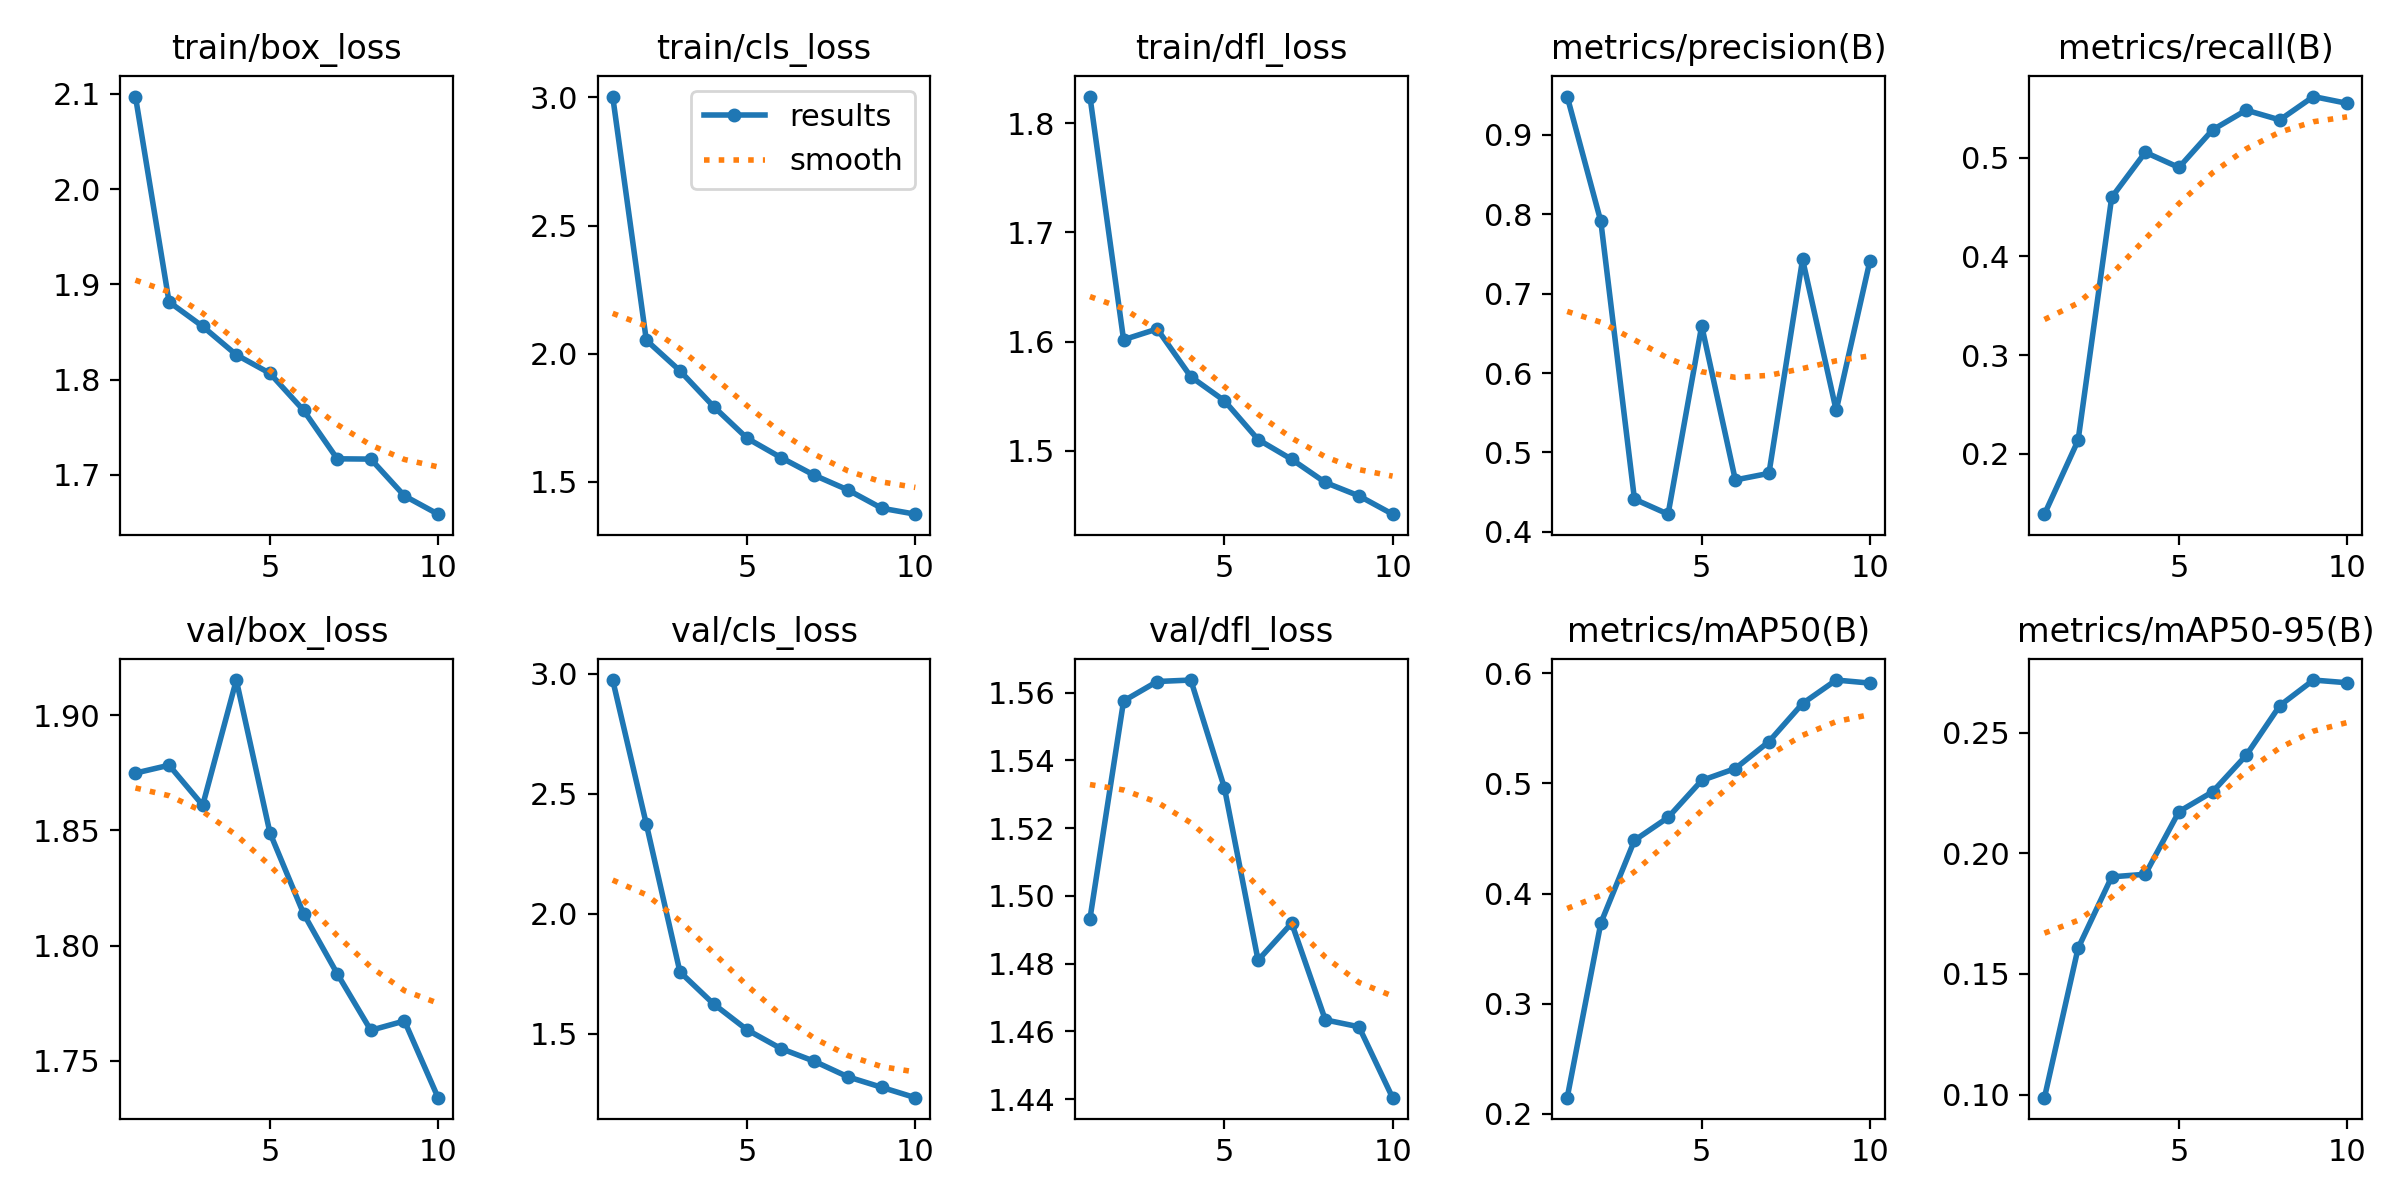

✅ Best model saved at: runs/detect/train/weights/best.pt


In [11]:
from IPython.display import Image, display

# Show training results image
display(Image(filename='runs/detect/train/results.png'))

# Best model path
print("✅ Best model saved at: runs/detect/train/weights/best.pt")


In [13]:
from ultralytics import YOLO
import cv2
from google.colab.patches import cv2_imshow

# Load your trained model
model = YOLO("runs/detect/train/weights/best.pt")

# Path to your uploaded video
video_path = "video.mp4"  # Replace with the exact filename if different

# Open video
cap = cv2.VideoCapture(video_path)
width  = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps    = cap.get(cv2.CAP_PROP_FPS)

# Output video writer
out = cv2.VideoWriter("detected_output.mp4", cv2.VideoWriter_fourcc(*'mp4v'), fps, (width, height))

# Define class labels (adjust according to your dataset's label IDs)
class_map = {
    1: "No Helmet",  # class ID 1 = No Helmet
    2: "Helmet"      # class ID 2 = Helmet
}

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    results = model(frame, conf=0.4)[0]

    for box in results.boxes:
        cls_id = int(box.cls[0])
        conf = float(box.conf[0])
        x1, y1, x2, y2 = map(int, box.xyxy[0])

        if cls_id not in class_map:
            continue  # Ignore other classes

        label = f"{class_map[cls_id]} {conf:.2f}"
        color = (0, 0, 255) if cls_id == 1 else (0, 255, 0)  # Red for No Helmet, Green for Helmet

        cv2.rectangle(frame, (x1, y1), (x2, y2), color, 2)
        cv2.putText(frame, label, (x1, y1 - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, color, 2)

    out.write(frame)

cap.release()
out.release()

print("✅ Detection complete. Output saved as: detected_output.mp4")



0: 384x640 (no detections), 43.6ms
Speed: 2.7ms preprocess, 43.6ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 8.8ms
Speed: 3.6ms preprocess, 8.8ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 8.6ms
Speed: 3.6ms preprocess, 8.6ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 7.3ms
Speed: 3.1ms preprocess, 7.3ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 7.0ms
Speed: 2.7ms preprocess, 7.0ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 7.1ms
Speed: 2.7ms preprocess, 7.1ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 7.1ms
Speed: 3.1ms preprocess, 7.1ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 7.1ms
Speed: 2.7ms preprocess, 7.1ms inference, 0.7m

In [14]:
from google.colab import files
files.download("detected_output.mp4")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>